In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics, preprocessing
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_pickle('masterPitchDataFrame.pkl')
# rename columns                                                                             1                  2             3             4                     5                6                     7                8            9       10       11        12       13       14       15       16        17        18          19         20         21        22                   23              24                  25                 26                27                28               29                30                 31                  32                      33                34 
data.columns = ['chorus_num', 'year','rank','min pitch','max pitch','semitones','zero crossing rate','energy','entropy of energy','spectral centroid','spectral spread','spectral entropy','spectral flux','spectral rolloff','MFCC 1','MFCC 2','MFCC 3', 'MFCC 4','MFCC 5','MFCC 6','MFCC 7','MFCC 8', 'MFCC 9', 'MFCC 10', 'MFCC 11', 'MFCC 12','MFCC 13','chroma vector 1','chroma vector 2','chroma vector 3','chroma vector 4', 'chroma vector 5','chroma vector 6','chroma vector 7','chroma vector 8','chroma vector 9','chroma vector 10','chroma vector 11','chroma vector 12','chroma deviation']
#print data.head(10)

In [7]:
#separate by chorus number to see if it makes a difference 
data1 = data[(data.chorus_num == 't1')]
data2 = data[(data.chorus_num == 't2')]
no_year_data = data.drop('year', axis = 1) #also try t1 and t2 w/o years
no_year_data1= no_year_data[(data.chorus_num == 't1')]
no_year_data2= no_year_data[(data.chorus_num == 't2')]

In [8]:
#features = list (set(list(data.columns))-set(target_col))

columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["rank","chorus_num"]]

columns1 = no_year_data.columns.tolist()
columns1 = [c for c in columns1 if c not in ["rank","chorus_num"]]
#print data1.columns


#chorus 1
y = data1["rank"]#.astype(float)
X = data1[columns]
#chorus 2
y2 = data2["rank"]
X2 = data2[columns]
#all chorus, no year
y3 = no_year_data["rank"]
X3 = no_year_data[columns1]
#chorus 1, no year
y4 = no_year_data1["rank"]
X4 = no_year_data1[columns1]
#chorus 2, no year
y5 = no_year_data2["rank"]
X5 = no_year_data2[columns1]
#all chorus
y6 = data["rank"]
X6 = data[columns]

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X2 = scaler.fit_transform(X2)

X3 = scaler.fit_transform(X3)

X4 = scaler.fit_transform(X4)

X5 = scaler.fit_transform(X5)

X6 = scaler.fit_transform(X6)
#y = scaler.fit_transform(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size= .70 )

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
#dir(mord.metrics)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, train_size= .70 )

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, train_size= .70 )

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30, train_size= .70 )

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.30, train_size= .70 )

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.30, train_size= .70 )


(390, 38) (390,)
(168, 38) (168,)


cross-Validated scores:  923.556896523


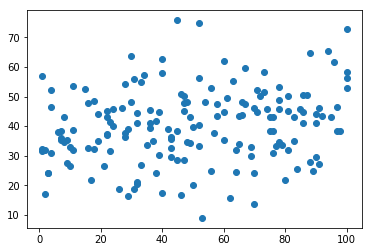

Cross-Predicted Accuracy 892.528132711


In [18]:
model = linear_model.SGDRegressor()

reg_scores = cross_val_score(model, X_train, y_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "cross-Validated scores: ", reg_scores.mean()*(-1)
#score to beat 916.90

reg_predictions = cross_val_predict(model, X_test,y_test,cv = 10)

plt.scatter(y_test,reg_predictions)
plt.show()

reg_accuracy = metrics.mean_squared_error(y_test,reg_predictions)
print "Cross-Predicted Accuracy", reg_accuracy 

Chorus 2. cross-Validated scores:  928.946495265


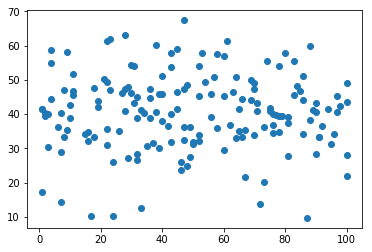

Cross-Predicted Accuracy 902.555907236
All Chorus No Year. cross-Validated scores:  870.948350191


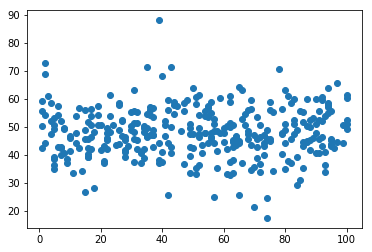

Cross-Predicted Accuracy 888.893049578
Chorus 1, no year. cross-Validated scores:  866.588565001


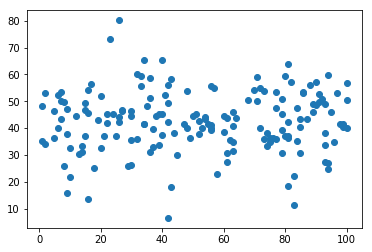

Cross-Predicted Accuracy 1061.17563985

 Chorus 2, no year. cross-Validated scores:  897.24938325


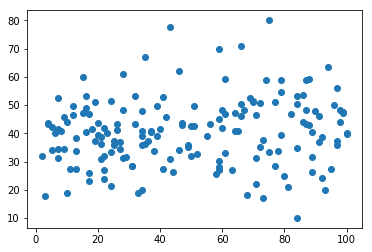

Cross-Predicted Accuracy 990.130480571

 All chorus. cross-Validated scores:  836.888072462


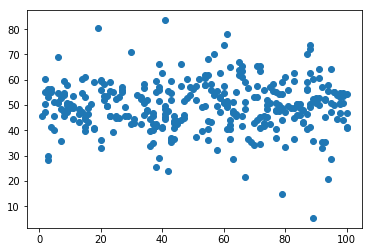

Cross-Predicted Accuracy 942.45013263


In [19]:
reg_scores2 = cross_val_score(model, X2_train, y2_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "Chorus 2. cross-Validated scores: ", reg_scores2.mean()*(-1)

reg_predictions2 = cross_val_predict(model, X2_test,y2_test,cv = 10)

plt.scatter(y_test,reg_predictions2)
plt.show()

reg_accuracy2 = metrics.mean_squared_error(y2_test,reg_predictions2)
print "Cross-Predicted Accuracy", reg_accuracy2 



#* * * * * * * * * * * * *  * * * ** * * * * * ** * * * * * * * * * * * * * * * * *
reg_scores3 = cross_val_score(model, X3_train, y3_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "All Chorus No Year. cross-Validated scores: ", reg_scores3.mean()*(-1)

reg_predictions3 = cross_val_predict(model, X3_test,y3_test,cv = 10)

plt.scatter(y3_test,reg_predictions3)
plt.show()

reg_accuracy3 = metrics.mean_squared_error(y3_test,reg_predictions3)
print "Cross-Predicted Accuracy", reg_accuracy3



#* * * * * * * * * * * * *  * * * ** * * * * * ** * * * * * * * * * * * * * * * * *
reg_scores4 = cross_val_score(model, X4_train, y4_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "Chorus 1, no year. cross-Validated scores: ", reg_scores4.mean()*(-1)

reg_predictions4 = cross_val_predict(model, X4_test,y4_test,cv = 10)

plt.scatter(y4_test,reg_predictions4)
plt.show()

reg_accuracy4 = metrics.mean_squared_error(y4_test,reg_predictions4)
print "Cross-Predicted Accuracy", reg_accuracy4


#* * * * * * * * * * * * *  * * * ** * * * * * ** * * * * * * * * * * * * * * * * *
reg_scores5 = cross_val_score(model, X5_train, y5_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "\n Chorus 2, no year. cross-Validated scores: ", reg_scores5.mean()*(-1)

reg_predictions5 = cross_val_predict(model, X5_test,y5_test,cv = 10)

plt.scatter(y5_test,reg_predictions5)
plt.show()

reg_accuracy5 = metrics.mean_squared_error(y5_test,reg_predictions5)
print "Cross-Predicted Accuracy", reg_accuracy5

#* * * * * * * * * * * * *  * * * ** * * * * * ** * * * * * * * * * * * * * * * * *
reg_scores6 = cross_val_score(model, X6_train, y6_train, cv=10,scoring='neg_mean_squared_error')
#scoring='neg_mean_squared_error'
print "\n All chorus. cross-Validated scores: ", reg_scores6.mean()*(-1)

reg_predictions6 = cross_val_predict(model, X6_test,y6_test,cv = 10)

plt.scatter(y6_test,reg_predictions6)
plt.show()

reg_accuracy6 = metrics.mean_squared_error(y6_test,reg_predictions6)
print "Cross-Predicted Accuracy", reg_accuracy6